# Assignment 2

In [1]:
# import needed packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

## Part 1: Data Exploration

### Load Diabetes bunch object from scikit-learn into a variable

In [2]:
diabetes = datasets.load_diabetes()
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
# load features into pandas df with proper column names
df = pd.DataFrame(diabetes['data'])
df.columns = diabetes['feature_names']

# add target variable to same dataframe
df['progression'] = diabetes['target']

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


#### General Data Exploration

In [5]:
# check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


There are no null values in our data set that we need to worry about.

In [6]:
# take a look at the descriptive statistics of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


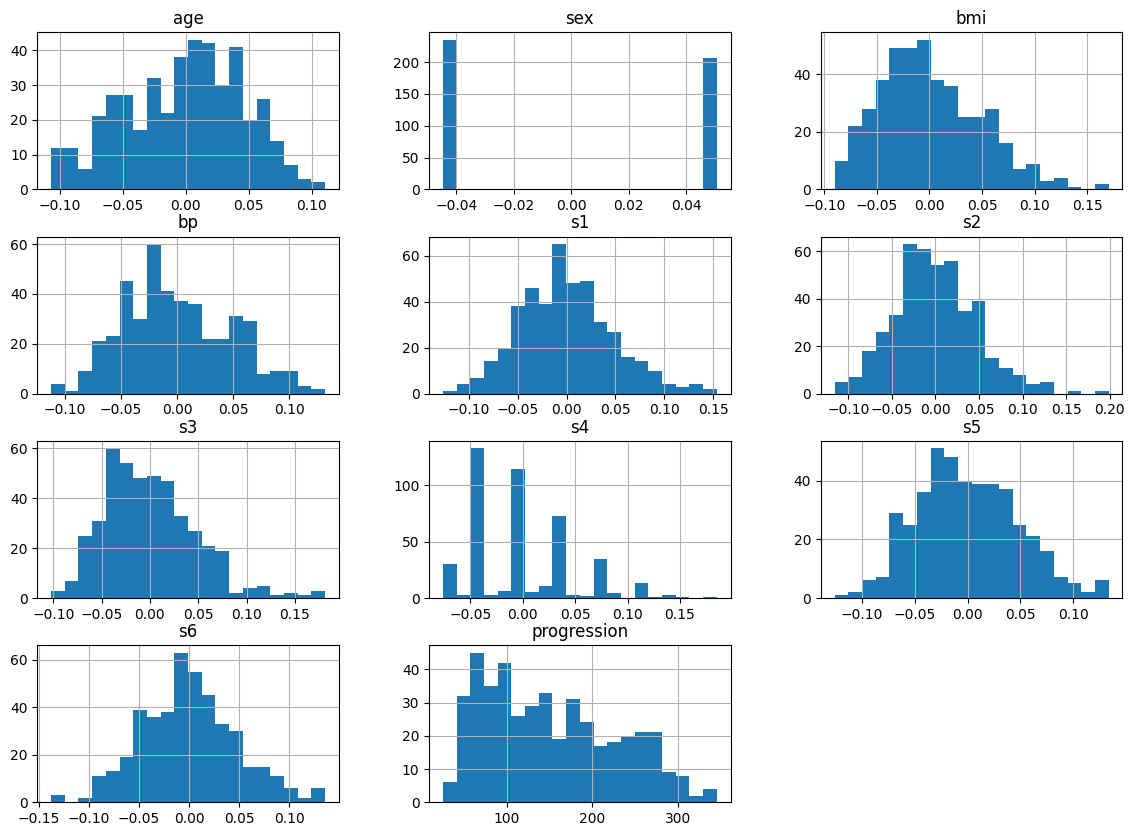

In [7]:
# plot histograms of each column of the data
df.hist(bins= 20, figsize= (14, 10));

In [8]:
# create a correlation matrix from the data set
corr_db = df.corr()
corr_db

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


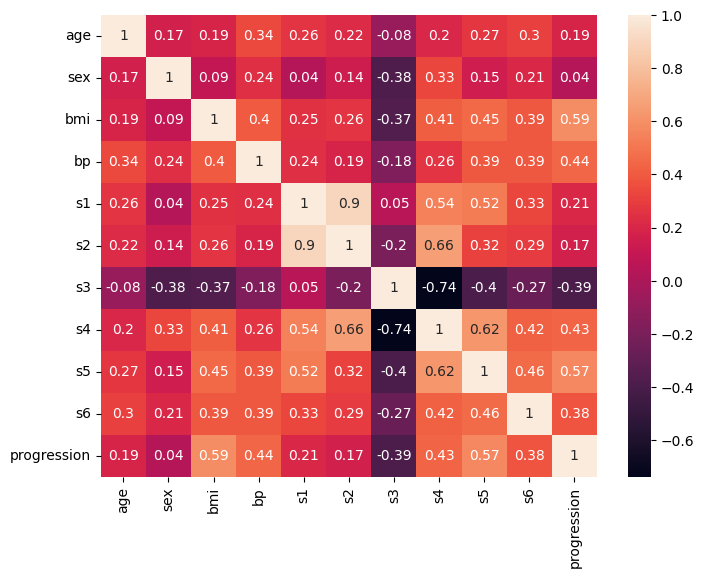

In [9]:
# plot the correlation matrix with a Seaborn heatmap
fig = plt.figure(figsize= (8, 6))
sns.heatmap(corr_db.round(2), annot= True)
plt.show()

In [10]:
# convert correlation matrix into dataframe of feature pairs
corr_db.round(2)
nrows, ncols = corr_db.shape

corr_df = corr_db.stack().reset_index()
corr_df.columns = ['variable1', 'variable2', 'correlation']
corr_df.head()

,variable1,variable2,correlation
0,age,age,1.000000
1,age,sex,0.173737
2,age,bmi,0.185085
3,age,bp,0.335428
4,age,s1,0.260061


In [11]:
# drop duplicates and Corr(A, A)
corr_df = corr_df[corr_df.variable2 > corr_df.variable1]

In [12]:
corr_df = corr_df.loc[corr_df.correlation.abs().sort_values(ascending= False).index]
corr_df.head(10)

,variable1,variable2,correlation
49,s1,s2,0.896663
73,s3,s4,-0.738493
62,s2,s4,0.659817
85,s4,s5,0.617859
32,bmi,progression,0.586450
118,progression,s5,0.565883
51,s1,s4,0.542207
52,s1,s5,0.515503
97,s5,s6,0.464669
30,bmi,s5,0.446157


In [13]:
corr_df[(corr_df.variable1 == 'progression') | (corr_df.variable2 == 'progression')]

,variable1,variable2,correlation
32,bmi,progression,0.586450
118,progression,s5,0.565883
43,bp,progression,0.441482
117,progression,s4,0.430453
116,progression,s3,-0.394789
119,progression,s6,0.382483
114,progression,s1,0.212022
10,age,progression,0.187889
115,progression,s2,0.174054
111,progression,sex,0.043062


Using a Seaborn pairplot, look at the scatter plots of the three values with the highest target correlation. From our table above, the three variables would be 'bmi', 's5', and 'bp'.

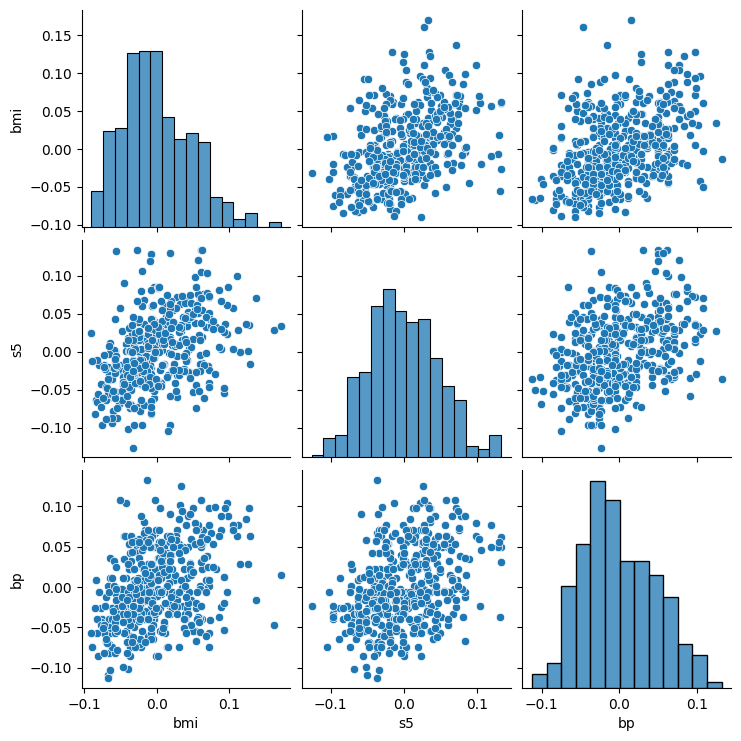

In [14]:
sns.pairplot(df,
             x_vars= ['bmi', 's5', 'bp'],
             y_vars= ['bmi', 's5', 'bp'])

#### Split Data into Test and Train Sets

In [15]:
features_train, features_test, target_train, target_test = train_test_split(df.drop(columns= ['progression']), 
                                                                            df['progression'],
                                                                            test_size= 0.20, random_state= 42)

# confirming correct split
features_train.count(), features_test.count(), target_train.count(), target_test.count()

(age    353
 sex    353
 bmi    353
 bp     353
 s1     353
 s2     353
 s3     353
 s4     353
 s5     353
 s6     353
 dtype: int64,
 age    89
 sex    89
 bmi    89
 bp     89
 s1     89
 s2     89
 s3     89
 s4     89
 s5     89
 s6     89
 dtype: int64,
 353,
 89)

### Part 2: Model Training

Train a linear regression model using the training set and print the RMSE.

In [16]:
# import needed library
from sklearn.linear_model import LinearRegression

In [17]:
# fit the linear model on the training data
linear_model = LinearRegression()
linear_model.fit(features_train, target_train)

LinearRegression()

In [18]:
# use the model to make predictions on the training data
linear_preds = linear_model.predict(features_train)

In [19]:
# calculate and print out the RMSE of the model for the training
linear_RMSE = np.sqrt(mean_squared_error(target_train, linear_preds))
print(f'Linear Regression RMSE: {linear_RMSE}')

Linear Regression RMSE: 53.55884336723094


Implement a cross_val_score on a decision tree regressor using the training set. Print out the root mean and standard deviation.

In [20]:
# import needed library
from sklearn.tree import DecisionTreeRegressor

In [21]:
# fit decision tree model on the training data
dec_tree = DecisionTreeRegressor(random_state= 42)

In [22]:
# implement cross validation
cv_score = cross_val_score(estimator= dec_tree, X= features_train, y= target_train, scoring= 'neg_mean_squared_error')
np.sqrt(-cv_score)

array([74.57079064, 80.9946964 , 80.65148462, 79.58391797, 85.39036413])

In [23]:
print(f'Mean of Root CV Scores: {np.mean(np.sqrt((-cv_score)))}')

Mean of Root CV Scores: 80.23825075305339


In [24]:
print(f'Standard Deviation of Root CV Scores: {np.std(np.sqrt((-cv_score)))}')

Standard Deviation of Root CV Scores: 3.4593496489292495


Implement a RandomForestRegressor. Print out the root mean and standard deviation.

In [25]:
# import needed library
from sklearn.ensemble import RandomForestRegressor

In [26]:
# fit the random forest model on the training data
rand_for = RandomForestRegressor(random_state= 42)

In [27]:
# implement cross validation
cv_score_rand_for = cross_val_score(estimator= rand_for, X= features_train, y= target_train, scoring= 'neg_mean_squared_error')
np.sqrt(-cv_score_rand_for)

array([54.52038723, 68.00166439, 56.88656819, 60.04114143, 55.87601656])

In [28]:
print(f'Mean of Root CV Scores: {np.mean(np.sqrt((-cv_score_rand_for)))}')

Mean of Root CV Scores: 59.06515556124806


In [29]:
print(f'Standard Deviation of Root CV Scores: {np.std(np.sqrt((-cv_score_rand_for)))}')

Standard Deviation of Root CV Scores: 4.824634867014727


The linear regression model has the lowest RMSE score of the three models.

## Part 3: Model Tuning

Print out parameters of random forest model.

In [32]:
rand_for.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Random Forest Grid Search Cross-Validation Version 1:

In [33]:
# do a grid search cross-validation with values given in assignment
from sklearn.model_selection import GridSearchCV

param_grid1 = {'n_estimators': [3, 10, 30],
              'max_features': [2, 4, 6, 8],
             }

grid_search1 = GridSearchCV(estimator= rand_for,
                           param_grid= param_grid1,
                           cv= 5,
                           verbose= 5,
                           scoring= 'neg_mean_squared_error')

In [34]:
# execute the grid search
grid_search1.fit(features_train, target_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_features=2, n_estimators=3;, score=-3758.033 total time=   0.0s
[CV 2/5] END max_features=2, n_estimators=3;, score=-4804.987 total time=   0.0s
[CV 3/5] END max_features=2, n_estimators=3;, score=-4689.446 total time=   0.0s
[CV 4/5] END max_features=2, n_estimators=3;, score=-4721.275 total time=   0.0s
[CV 5/5] END max_features=2, n_estimators=3;, score=-5299.579 total time=   0.0s
[CV 1/5] END max_features=2, n_estimators=10;, score=-3163.948 total time=   0.0s
[CV 2/5] END max_features=2, n_estimators=10;, score=-4435.967 total time=   0.0s
[CV 3/5] END max_features=2, n_estimators=10;, score=-3477.769 total time=   0.0s
[CV 4/5] END max_features=2, n_estimators=10;, score=-4178.408 total time=   0.0s
[CV 5/5] END max_features=2, n_estimators=10;, score=-4078.243 total time=   0.0s
[CV 1/5] END max_features=2, n_estimators=30;, score=-3012.875 total time=   0.0s
[CV 2/5] END max_features=2, n_estimators=

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error', verbose=5)

Print out the best parameters and best performing model based on this grid search.

In [35]:
grid_search1.best_params_, grid_search1.best_estimator_

({'max_features': 4, 'n_estimators': 30},
 RandomForestRegressor(max_features=4, n_estimators=30, random_state=42))

Using the cv_results dictionary, print out the RMSE of each feature combination for comparision.

In [38]:
params_rmse1 = np.array(list(zip(grid_search1.cv_results_['params'], np.sqrt(-grid_search1.cv_results_['mean_test_score']))))

params_rmse1

array([[{'max_features': 2, 'n_estimators': 3}, 68.22509849304959],
       [{'max_features': 2, 'n_estimators': 10}, 62.18413662249328],
       [{'max_features': 2, 'n_estimators': 30}, 60.01374984637889],
       [{'max_features': 4, 'n_estimators': 3}, 64.00409712600997],
       [{'max_features': 4, 'n_estimators': 10}, 60.03785886742053],
       [{'max_features': 4, 'n_estimators': 30}, 58.60379513290442],
       [{'max_features': 6, 'n_estimators': 3}, 65.67786393348364],
       [{'max_features': 6, 'n_estimators': 10}, 61.770707001464416],
       [{'max_features': 6, 'n_estimators': 30}, 59.07097596098849],
       [{'max_features': 8, 'n_estimators': 3}, 66.11809881780495],
       [{'max_features': 8, 'n_estimators': 10}, 61.89644120466714],
       [{'max_features': 8, 'n_estimators': 30}, 60.11951312878325]],
      dtype=object)

Also print out the feature importances of the best performing grid search model

In [39]:
dict(sorted(dict(zip(features_train.columns, grid_search1.best_estimator_.feature_importances_)).items(),
            key= lambda item: item[1], reverse= True))

{'bmi': 0.30517819270397956,
 's5': 0.16999085908790595,
 'bp': 0.11165754944907068,
 's3': 0.0854901286796032,
 's2': 0.06849486975634633,
 's4': 0.064198732447045,
 's6': 0.06404864069628456,
 's1': 0.06238816853611521,
 'age': 0.05908923786588064,
 'sex': 0.009463620777768822}

Random Forest Grid Search Cross-Validation Version 2:

In [40]:
# grid search with alternate values in assignment
param_grid2 = {'bootstrap': [False],
                'n_estimators': [3, 10],
                'max_features': [2, 3, 4],
             }

grid_search2 = GridSearchCV(estimator= rand_for,
                            param_grid= param_grid2,
                            cv= 5,
                            verbose= 1,
                            scoring= 'neg_mean_squared_error')

In [41]:
# execute the grid search
grid_search2.fit(features_train, target_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [False], 'max_features': [2, 3, 4],
                         'n_estimators': [3, 10]},
             scoring='neg_mean_squared_error', verbose=1)

Print out the best parameters and best performing model based on this grid search.

In [42]:
grid_search2.best_params_, grid_search2.best_estimator_

({'bootstrap': False, 'max_features': 2, 'n_estimators': 10},
 RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=10,
                       random_state=42))

Using the cv_results dictionary, print out the RMSE of each feature combination for comparision.

In [43]:
params_rmse2 = np.array(list(zip(grid_search2.cv_results_['params'], np.sqrt(-grid_search2.cv_results_['mean_test_score']))))

params_rmse2

array([[{'bootstrap': False, 'max_features': 2, 'n_estimators': 3},
        66.05734919384311],
       [{'bootstrap': False, 'max_features': 2, 'n_estimators': 10},
        59.9081286174646],
       [{'bootstrap': False, 'max_features': 3, 'n_estimators': 3},
        69.92185613008961],
       [{'bootstrap': False, 'max_features': 3, 'n_estimators': 10},
        64.96928843258651],
       [{'bootstrap': False, 'max_features': 4, 'n_estimators': 3},
        68.18892958896414],
       [{'bootstrap': False, 'max_features': 4, 'n_estimators': 10},
        61.115235936560765]], dtype=object)

Also print out the feature importances of the best performing grid search model.

In [44]:
dict(sorted(dict(zip(features_train.columns, grid_search2.best_estimator_.feature_importances_)).items(),
            key= lambda item: item[1], reverse= True))

{'bmi': 0.2553316610425949,
 's5': 0.1520282816868592,
 'bp': 0.1077555192394429,
 's4': 0.09108427601543241,
 's3': 0.08342799439074733,
 's2': 0.08044936846990489,
 's6': 0.07867169374781266,
 'age': 0.0694158377689439,
 's1': 0.06930648542307749,
 'sex': 0.012528882215184342}

In both instances of the grid search, the top three features of the best performing models were 'bmi', 's5', and 'bp'. This is similiar to what we saw in our correlation matrix that we implemented earlier.

### Part 4: Model Evaluation

Out of the models trained in this assignment, the multi-variable linear regression model has the lowest RMSE score and is thus the better performing model (based on that evaluation criteria).

Evaluate the multi-variable linear regression model on the test set.

In [46]:
# make predictions
lin_reg_preds = linear_model.predict(features_test)

In [47]:
# calculate RMSE on test set
np.sqrt(mean_squared_error(target_test, lin_reg_preds))

53.853445836765914

Our single feature model from Assignment 1, had an RMSE of ~50.478. Let's train a single feature model on this data split and see how it compares to the multi-variable linear regression model.

In [53]:
single_lin_model = LinearRegression()
single_lin_model.fit(features_train[['bmi']], target_train)

LinearRegression()

In [54]:
np.sqrt(mean_squared_error(target_test, single_lin_model.predict(features_test[['bmi']])))

63.73245584860925

When compared to the multi-feature linear regression model, the single feature linear regression model has a higher RMSE.

Thus, the best performing model is the multi-feature linear regression model.